<a href="https://colab.research.google.com/github/komorimasashi/kakuritsu_toukei_1/blob/main/7th_lec_mean_deviation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 位置とばらつきの統計量の活用

##概要

**目的**

標準偏差（S.D.）は「平均からのずれの程度を表す単位」
としても使われる．
平均と標準偏差を利用してデータを比較可能な形に変換する方法を学ぶ．


**今回使うライブラリ**

*   NumPy：数値・ベクトル・行列演算ライブラリ
*   SciPy: 高度な科学(science)計算を行うためのライブラリ
*   Pandas： データの集計や可視化を統合的に行うライブラリ

##SciPyの基本的な使い方


Scipyは科学技術計算をするためのモジュールで，統計的な処理を含む多様な数学的演算ができます．Scipyの中には様々なサブモジュールがあります．サブモジュールを使うには下のように「.」（ピリオド）でつないでサブモジュールを指定します．下はサブモジュールの一例です．

*   scipy.stats: 統計
*   scipy.linalg: 線形代数
*   scipy.optimize: 最適化
*   scipy.signal: 信号処理
*   等々

練習として，ここではscipy.linalgを使って線形代数の逆行列や固有値を求めてみましょう．

###Scipyライブラリの読み込み

In [4]:
# Scipyのモジュールをspとして読み込む
import scipy as sp

# 線形代数用のサブモジュールを linalg（linear algebra（線形代数）の略ね）として使えるようにする
from scipy import linalg
# 統計分析用のサブモジュールをstats（statistics（統計学）の略ね）として使えるようにする
from scipy import stats

# Numpyモジュールの読み込み
import numpy as np

###Scipy.lialgのメソッドを使う

$
  A = \left(
    \begin{array}{ccc}
      1 & 2 & 3 \\
      1 & 3 & 2 \\
      3 & 1 & 2
    \end{array}
  \right)
$

行列Aに対して行列式（determinant; いわゆる「$ad-bc$」です）を求めてみましょう

scipy.linalg.detを使います．

In [5]:
# サンプルデータ作成
sample_matrix_data = np.array([[1,2,3],[1,3,2],[3,1,2]])

# 行列式
print(linalg.det(sample_matrix_data))

-12.0


次は逆行列

In [6]:
# 逆行列
print(linalg.inv(sample_matrix_data))

[[-0.33333333  0.08333333  0.41666667]
 [-0.33333333  0.58333333 -0.08333333]
 [ 0.66666667 -0.41666667 -0.08333333]]


試しに，行列とその逆行列をnp.dot()関数を使ってかけ合わせてみましょう．

ちゃんと単位行列になりますね？

In [7]:
np.dot(sample_matrix_data, linalg.inv(sample_matrix_data))

array([[ 1.00000000e+00, -1.11022302e-16, -2.77555756e-17],
       [ 0.00000000e+00,  1.00000000e+00,  0.00000000e+00],
       [ 2.22044605e-16, -1.11022302e-16,  1.00000000e+00]])

固有値と固有ベクトルも簡単に求められます

In [8]:
# 固有値と固有ベクトル（ linalg.eig()関数は戻り値が２つあることに注意しよう）
eig_value, eig_vector = linalg.eig(sample_matrix_data)

# 固有値と固有ベクトル
print("固有値")
print(eig_value)
print("固有ベクトル")
print(eig_vector)

固有値
[ 6.        +0.j -1.41421356+0.j  1.41421356+0.j]
固有ベクトル
[[-0.57735027 -0.72236645  0.16041816]
 [-0.57735027 -0.14290228 -0.81090869]
 [-0.57735027  0.67658381  0.56275492]]


###Scipy.statsのメソッドを使う
まだ推測統計学を学んでいない皆さんには早いかもしれないが，Scipy.statsではさまざまな統計分析に関わる様々な関数を揃えている．

まずはテストの点数X={10, 20, 30, 40, 50}からそれぞれの受験者の「偏差値」を求めてみよう．

$偏差値=zスコア×10 + 50$

In [9]:
x = np.array([10, 20, 30, 40, 50])
stats.zscore(x)*10 + 50

array([35.85786438, 42.92893219, 50.        , 57.07106781, 64.14213562])

正規分布の確率密度関数(probability density function, PDF)を書くことも簡単にできる．

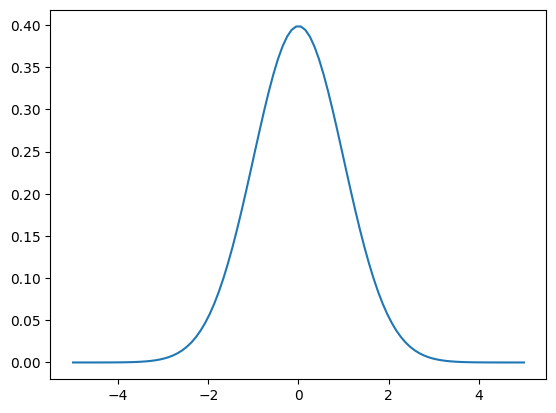

In [10]:
import matplotlib.pyplot as plt
x = np.linspace(-5,5,100)
p = stats.norm.pdf(x)
plt.plot(x,p)
plt.show()

##平均値や標準偏差の利用

###zスコア（標準得点）

####学力偏差値

テストの点数X={10, 20, 30, 40, 50}からそれぞれの受験者の「学力偏差値」を求めてみよう．

$学力偏差値=zスコア×10 + 50$

In [11]:
x = np.array([10, 20, 30, 40, 50])
stats.zscore(x)*10 + 50

array([35.85786438, 42.92893219, 50.        , 57.07106781, 64.14213562])

**仮想データを作成し偏差値を求める**

平均50点，標準偏差5点のうそこデータを作成するソース

,sugaku,eigo
count,40.000000,40.000000
mean,50.700000,69.450000
std,5.034242,14.415003
min,39.000000,34.000000
25%,48.000000,61.000000
50%,51.000000,71.000000
75%,54.250000,78.000000
max,62.000000,100.000000


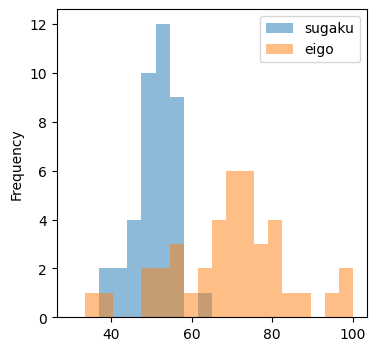

In [12]:
import numpy.random as rnd
import pandas as pd

#　乱数発生のシード値の固定(乱数のシードの値を1に変えて実行してみよう)
np.random.seed(1234)
num_students = 40
#randnは標準正規分布（平均=0, 分散=1）に従う乱数を所定の個数発生させる関数
sugaku = (np.random.randn(num_students) * 5 + 50).round()  #平均50点，標準偏差5点の得点を発生(数学)
eigo = (np.random.randn(num_students) * 15 + 70).round()  #平均50点，標準偏差15点の得点を発生（英語）

df = pd.DataFrame({ 'sugaku' : sugaku ,'eigo'   : eigo})
df.head()
df.plot( bins=20, alpha=0.5, figsize=(4,4), kind='hist', legend=True,range=(30,100))
df.describe()

上記のテストで数学が60点,英語が80点の人の学力偏差値

In [13]:
hensati_sugaku = (60 - df['sugaku'].mean())/df['sugaku'].std() *10 + 50
print("数学偏差値は%.1fです" %hensati_sugaku)

hensati_eigo = (80 - df['eigo'].mean())/df['eigo'].std() *10 + 50
print("英語偏差値は%.1fです" %hensati_eigo)

数学偏差値は68.5です
英語偏差値は57.3です


**正規分布を仮定し，偏差値と上位・下位の割合の関係を見てみる**

下のグラフを見ると偏差値40〜60の間に多くの人が存在することがわかる（面積が大きい）．

一方，偏差値20未満や80以上は全体の0.1%ほどしかいないことがわかる．

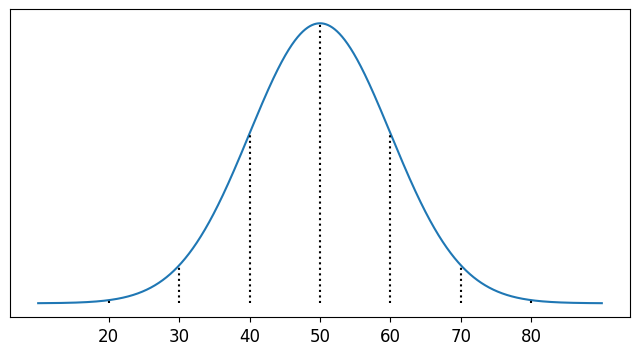

In [14]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,1,figsize=(8,4))
x = np.arange(-4, 4, 0.001)
p = stats.norm.pdf(x, scale=1)

ax.plot(x, p)
ax.set_xticks([-3, -2, -1, 0, 1, 2, 3])
ax.set_xticklabels(['20', '30', '40', '50', '60', '70', '80'],fontsize='large')
ax.set_yticks([])
for i in range(-3,4):
    ax.vlines(i, 0, stats.norm.pdf(i), "black", linestyles='dotted')

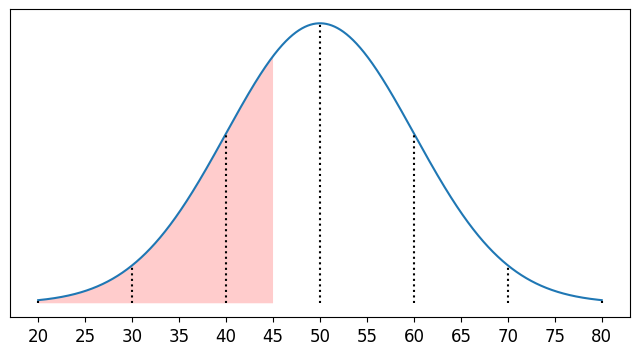

In [15]:
#偏差値45
fig, ax = plt.subplots(1,1,figsize=(8,4))
x = np.arange(-3, 3, 0.001)
p = stats.norm.pdf(x, scale=1)

ax.plot(x, p)
ax.set_xticks([-3, -2.5, -2,  -1.5, -1, -0.5,0, 0.5, 1, 1.5, 2,2.5, 3])
ax.set_xticklabels(['20','25', '30','35', '40','45', '50','55', '60', '65','70','75', '80'],fontsize='large')
ax.set_yticks([])
for i in range(-3,4):
    ax.vlines(i, 0, stats.norm.pdf(i), "black", linestyles='dotted')
ax.fill_between(x[(x < -0.5)],0,stats.norm.pdf(x[(x < -.5)], scale=1),facecolor='r',alpha=0.2)

####95%安全在庫

下の図の赤く塗られた部分の面積が0.95，それ以外の部分が0.05になっている．

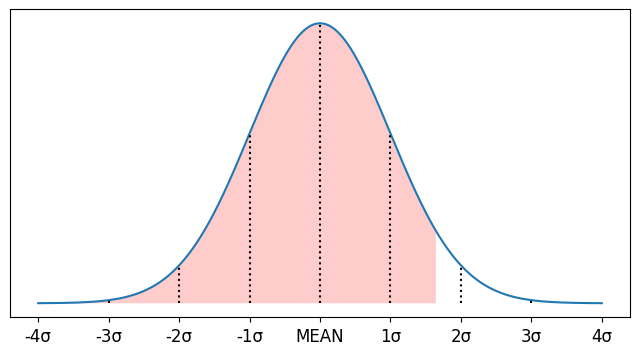

In [16]:
fig, ax = plt.subplots(1,1,figsize=(8,4))
x = np.arange(-4, 4, 0.001)
p = stats.norm.pdf(x, scale=1)

ax.plot(x, p)
ax.set_xticks([-4, -3, -2, -1, 0, 1, 2, 3, 4])
ax.set_xticklabels(['-4σ', '-3σ', '-2σ', '-1σ', 'MEAN', '1σ', '2σ', '3σ', '4σ'],fontsize='large')
ax.set_yticks([])
for i in range(-3,4):
    ax.vlines(i, 0, stats.norm.pdf(i), "black", linestyles='dotted')
ax.fill_between(x[(x <stats.norm.ppf(q=0.95, loc=0, scale=1))],0,stats.norm.pdf(x[(x <stats.norm.ppf(q=0.95, loc=0, scale=1))], scale=1),facecolor='r',alpha=0.2)

In [17]:
#1日の平均需要のσ = 5のときの1日の95％安全在庫
sigma = 5
anzen_zaiko =  sigma * stats.norm.ppf(q=0.95, loc=0, scale=1)
print(anzen_zaiko)

8.224268134757361


####x管理図

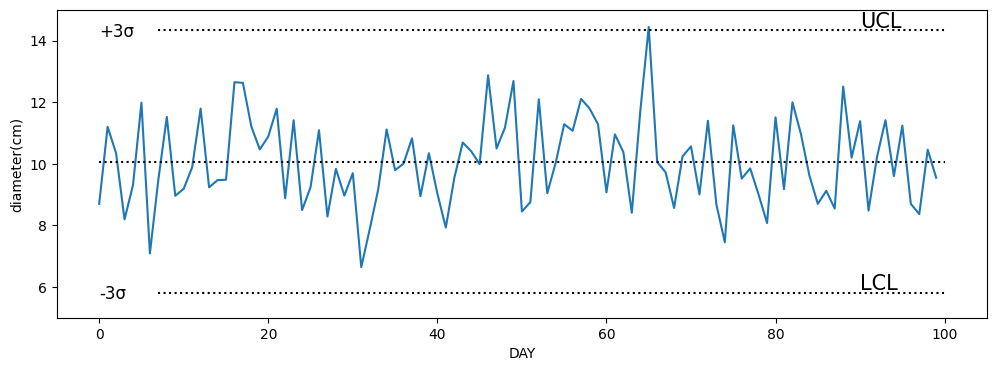

In [18]:
#　乱数発生のシード値の固定(乱数のシードの値を1に変えて実行してみよう)
np.random.seed(123)
num_samples = 100
#randnは標準正規分布（平均=0, 分散=1）に従う乱数を所定の個数発生させる関数
diameter = np.random.randn(num_samples) *1.2  + 10  #平均10，標準偏差1.2点の得点を発生(数学)

diameter[65] = 10 + 1.2 *3.7 #うそこデータの挿入（異常値）

plt.figure(figsize=(12,4))
plt.plot(diameter)
plt.ylim(5 , 15)
plt.xlabel('DAY')
plt.ylabel('diameter(cm)')

plt.hlines(diameter.mean() + diameter.std() *3, 7 , num_samples, "black", linestyles='dotted')
plt.hlines(diameter.mean()  - diameter.std() *3, 7, num_samples, "black", linestyles='dotted')
plt.text(90,diameter.mean()  + diameter.std() *3 +.1, "UCL", size = 15, color = "black")
plt.text(90,diameter.mean()  - diameter.std() *3+.1, "LCL", size = 15, color = "black")

plt.text(0,diameter.mean()  + diameter.std() *3 -.2, "+3σ", size = 12, color = "black")
plt.text(0,diameter.mean()  - diameter.std() *3-.2, "-3σ", size = 12, color = "black")

plt.hlines(diameter.mean() , 0, num_samples, "black", linestyles='dotted')
